In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

# The RNN model
class RNNResourceAllocator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNNResourceAllocator, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = 10
hidden_size = 64
output_size = 5
num_layers = 2
learning_rate = 0.001
num_epochs = 50

model = RNNResourceAllocator(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()  # Assuming a regression task
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

batch_size = 16
sequence_length = 5
features = torch.randn(batch_size, sequence_length, input_size)
allocations = torch.randn(batch_size, output_size)

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(features)
    loss = criterion(outputs, allocations)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete.")


Epoch [10/50], Loss: 0.5715
Epoch [20/50], Loss: 0.2734
Epoch [30/50], Loss: 0.0958
Epoch [40/50], Loss: 0.0293
Epoch [50/50], Loss: 0.0103
Training complete.


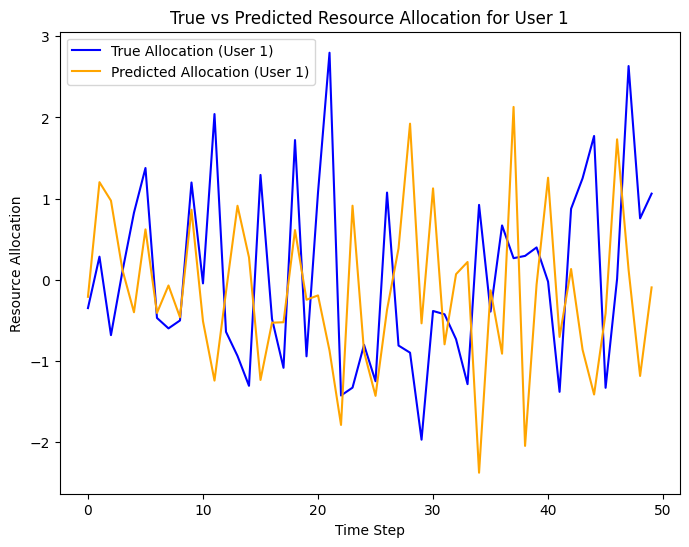

In [13]:
import matplotlib.pyplot as plt

time_steps = 50
true_allocations = torch.randn(time_steps).numpy()
predicted_allocations = torch.randn(time_steps).numpy()

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(true_allocations, label='True Allocation (User 1)', color='blue')
plt.plot(predicted_allocations, label='Predicted Allocation (User 1)', color='orange')

# Labels and title
plt.xlabel('Time Step')
plt.ylabel('Resource Allocation')
plt.title('True vs Predicted Resource Allocation for User 1')
plt.legend()

# Display the plot
plt.show()


In [15]:

loss_history = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(features)
    loss = criterion(outputs, allocations)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



Epoch [10/50], Loss: 0.0037
Epoch [20/50], Loss: 0.0007
Epoch [30/50], Loss: 0.0004
Epoch [40/50], Loss: 0.0002
Epoch [50/50], Loss: 0.0000


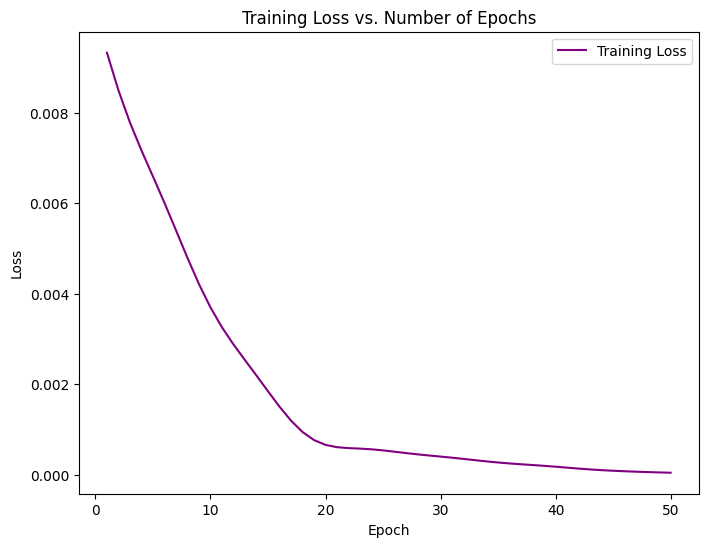

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs+1), loss_history, label='Training Loss', color='purple')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Number of Epochs')
plt.legend()
plt.show()


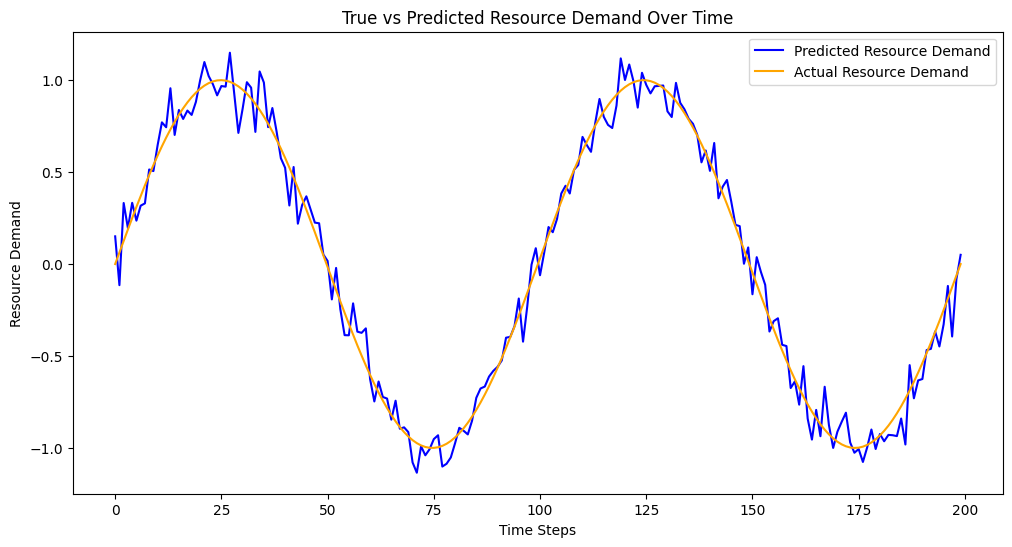

In [17]:
import matplotlib.pyplot as plt
time_steps = 200
true_demand = torch.sin(torch.linspace(0, 4 * torch.pi, time_steps)).numpy()
predicted_demand = true_demand + 0.1 * torch.randn(time_steps).numpy()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(predicted_demand, label='Predicted Resource Demand', color='blue')
plt.plot(true_demand, label='Actual Resource Demand', color='orange')

# Labels and title
plt.xlabel('Time Steps')
plt.ylabel('Resource Demand')
plt.title('True vs Predicted Resource Demand Over Time')
plt.legend()

plt.show()
